In [1]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use("../src/style.mplstyle")

In [18]:
path = "../data/raster/mallorquin/"
path_shp = "../data/shapefile/mangrove_forests.shp"

images = os.listdir(path)
index = np.random.randint(0, len(images))

path_img = path + images[index]
path_img

'../data/raster/mallorquin/2020-08-01.tif'

In [51]:
gdf = gpd.read_file(path_shp)
gdf = gdf[gdf.key == "mallorquin"]

with rasterio.open(path_img, "r") as src:
    lims = src.bounds

    ndvi = src.read(6)
    temp = src.read(5)

mask = np.ones(ndvi.shape)
mask[(ndvi == -3e5) | (ndvi > 1.0) | (ndvi < -1.0)] = np.nan

ndvi *= mask
temp *= mask

In [24]:
x = np.linspace(lims[0], lims[2], ndvi.shape[1])
y = np.linspace(lims[1], lims[3], ndvi.shape[0])

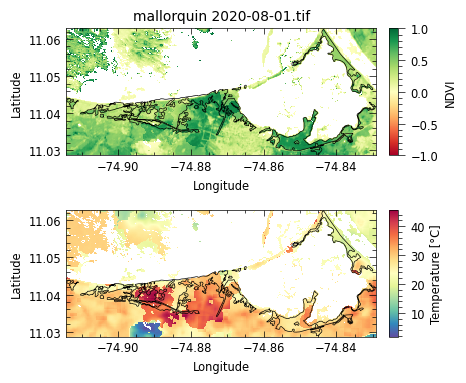

In [63]:
fig = plt.figure(figsize=[6, 4])

ax1 = plt.subplot(2, 1, 1)
im1 = ax1.pcolormesh(x, y, np.flip(ndvi, 0), cmap="RdYlGn", vmin=-1, vmax=1)
gdf.boundary.plot(color="k", linewidth=0.5, ax=ax1)

div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", "3%", 0.10)
bar1 = plt.colorbar(im1, cax=cax1, label="NDVI", orientation="vertical")

ax1.set(xlabel="Longitude", ylabel="Latitude", title=f"mallorquin {images[index]}")
bar1.ax.tick_params(axis="both", which="both", direction="out")

ax2 = plt.subplot(2, 1, 2)
im2 = ax2.pcolormesh(x, y, np.flip(temp, 0)-273.15, cmap="Spectral_r")
gdf.boundary.plot(color="k", linewidth=0.5, ax=ax2)

div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", "3%", 0.10)
bar2 = plt.colorbar(im2, cax=cax2, label="Temperature [°C]", orientation="vertical")

ax2.set(xlabel="Longitude", ylabel="Latitude")
bar2.ax.tick_params(axis="both", which="both", direction="out")

plt.show()